In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split

In [2]:
###1. Data Feteching from Yahoo Finance

In [3]:
#pip install yfinance
# Get the data for tatamotors
ticker = "MARICO.NS"  

# Download the data
data = yf.download(ticker, start="2021-04-01", end="2024-03-31")

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-01,411.299988,411.600006,406.200012,407.250000,389.247894,645008
2021-04-05,411.250000,417.000000,399.000000,402.450012,384.660004,2105709
2021-04-06,402.850006,405.549988,399.200012,403.000000,385.185730,1032326
2021-04-07,402.950012,413.500000,401.899994,408.000000,389.964691,1687852
2021-04-08,408.049988,415.600006,408.000000,414.649994,396.320709,1917274


In [5]:
###2. Select the Target Variable and Clean the data

In [6]:
# Select the Target Varibale Adj Close
df = data[['Adj Close']]

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
Adj Close    0
dtype: int64


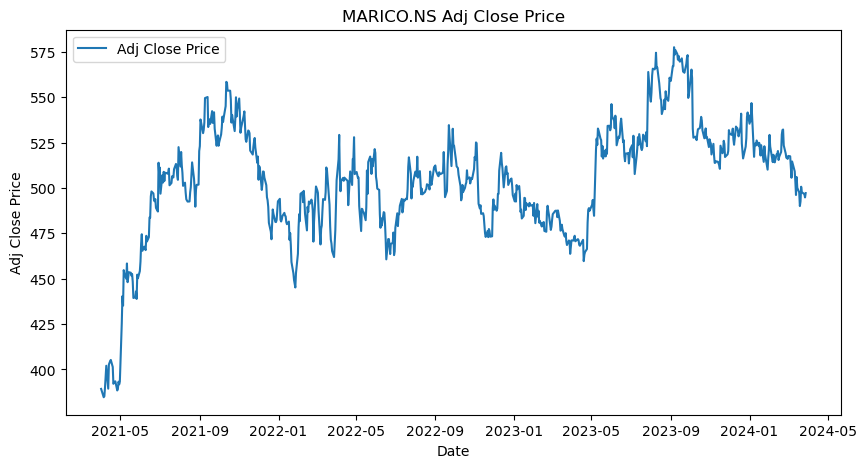

In [7]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(df, label='Adj Close Price')
plt.title('MARICO.NS Adj Close Price')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

In [8]:
###2.2 Decomposition of Time series


In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
df.columns

Index(['Adj Close'], dtype='object')

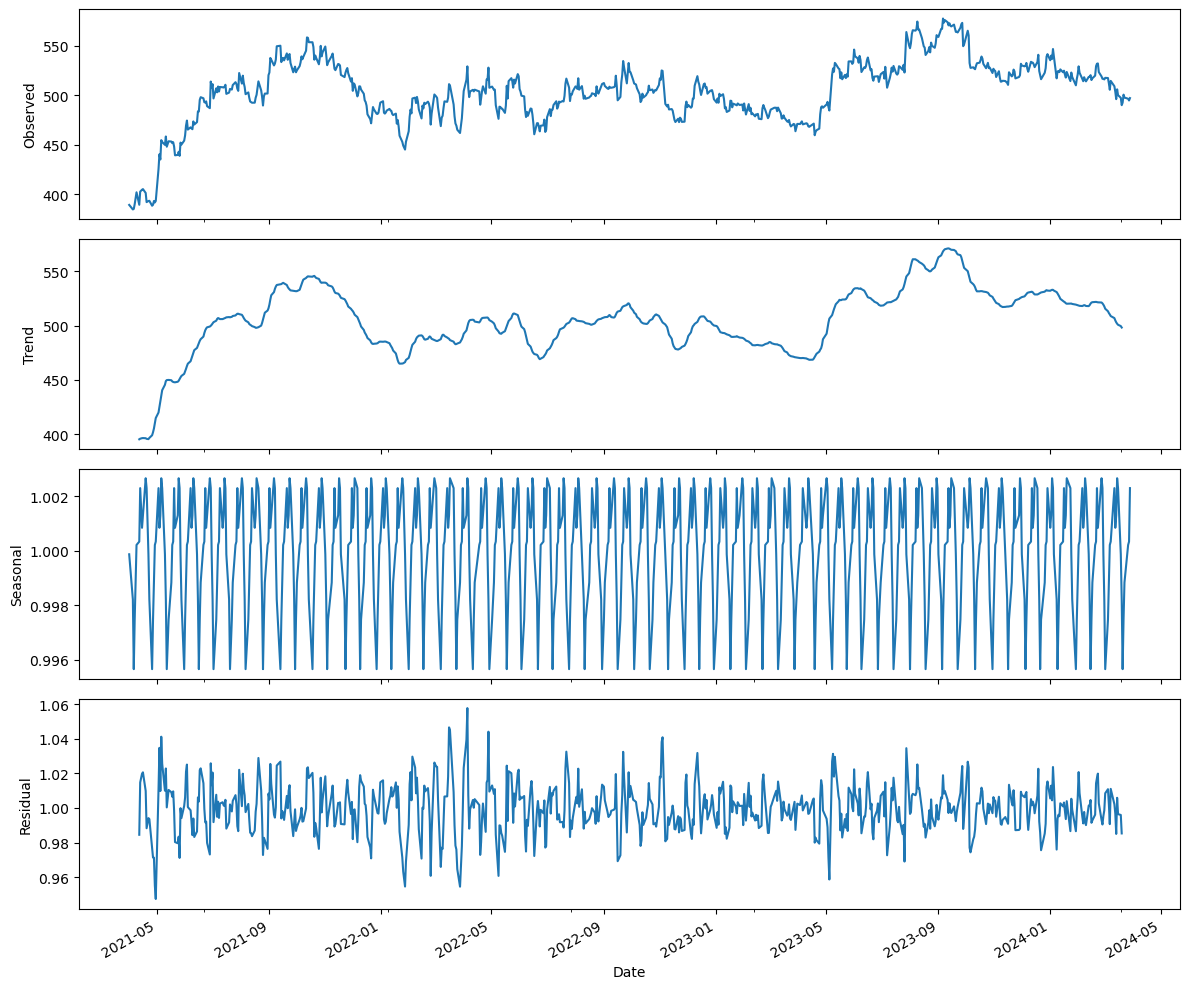

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df['Adj Close'], model='multiplicative', period=12)

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [11]:
# Split the data into training and test sets
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

In [12]:
#3. Univariate Forecasting - Conventional Models/Statistical Models
#3.1 HW Model


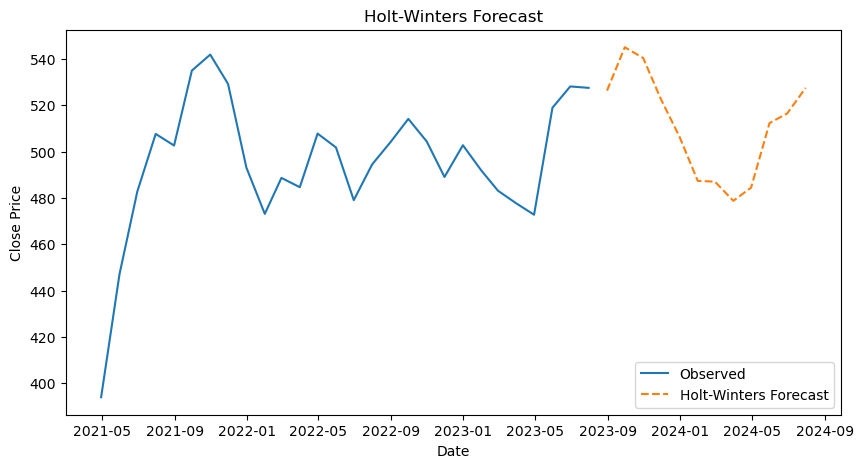

In [13]:
monthly_data = df.resample("M").mean()
# Split the data into training and test sets
train_data, test_data = train_test_split(monthly_data, test_size=0.2, shuffle=False)
len(monthly_data), len(train_data)
(36, 28)
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Holt-Winters model
holt_winters_model = ExponentialSmoothing(train_data, seasonal='mul', seasonal_periods=12).fit()

# Forecast for the next year (12 months)
holt_winters_forecast = holt_winters_model.forecast(12)
# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Observed')
plt.plot(holt_winters_forecast, label='Holt-Winters Forecast', linestyle='--')
plt.title('Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [14]:
# Forecast for the next year (12 months)
y_pred = holt_winters_model.forecast(8)
len(test_data), len(y_pred)

(8, 8)

In [15]:
y_pred, test_data

(2023-08-31    526.304390
 2023-09-30    545.055864
 2023-10-31    540.397206
 2023-11-30    522.571332
 2023-12-31    506.551659
 2024-01-31    487.352082
 2024-02-29    487.023930
 2024-03-31    478.735018
 Freq: M, dtype: float64,
              Adj Close
 Date                  
 2023-08-31  555.706601
 2023-09-30  567.795547
 2023-10-31  533.624863
 2023-11-30  519.570206
 2023-12-31  529.981714
 2024-01-31  525.168536
 2024-02-29  520.346421
 2024-03-31  502.761571)

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_data, y_pred))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(test_data, y_pred)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((test_data - y_pred) / test_data)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(test_data, y_pred)
print(f'R-squared: {r2}')

RMSE: 25.256607965883685
MAE: 22.563864793879375
MAPE: nan
R-squared: -0.6777020651457033


In [17]:
# Forecast for the next year (12 months)
holt_winters_forecast = holt_winters_model.forecast(len(test_data)+12)
holt_winters_forecast

2023-08-31    526.304390
2023-09-30    545.055864
2023-10-31    540.397206
2023-11-30    522.571332
2023-12-31    506.551659
2024-01-31    487.352082
2024-02-29    487.023930
2024-03-31    478.735018
2024-04-30    484.470129
2024-05-31    512.277203
2024-06-30    516.516402
2024-07-31    527.515820
2024-08-31    526.304390
2024-09-30    545.055864
2024-10-31    540.397206
2024-11-30    522.571332
2024-12-31    506.551659
2025-01-31    487.352082
2025-02-28    487.023930
2025-03-31    478.735018
Freq: M, dtype: float64

In [18]:
###3.2 ARIMA Montly Data
monthly_data.columns

Index(['Adj Close'], dtype='object')

In [22]:
pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/18/ec/f47a721071d084d6c2b6783eb8d058b964b1450cb708d920d0d792f42001/Cython-3.0.10-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   - ------------------------------------- 20.5/614.7 kB 217.9 kB/s eta 0:00:03
   - ------------------------------------- 30.7/614.7 kB 217.9 kB/s eta 0:00:03
   --- ----------------------------------- 61.4/614.7 kB 326.1 kB/s eta 0:00:02
   ----- --------------------------------- 92.2/614.7 kB 374.1 kB/s eta 0:00:02
   ------- ------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [23]:
from pmdarima import auto_arima

In [24]:
# Fit auto_arima model
arima_model = auto_arima(train_data['Adj Close'], 
                         seasonal=True, 
                         m=12,  # Monthly seasonality
                         stepwise=True, 
                         suppress_warnings=True)

# Print the model summary
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   28
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -123.197
Date:                Mon, 22 Jul 2024   AIC                            254.395
Time:                        19:58:14   BIC                            259.724
Sample:                    04-30-2021   HQIC                           256.024
                         - 07-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    183.3353     88.634      2.068      0.039       9.615     357.055
ar.L1          1.1807      0.266      4.431      0.000       0.658       1.703
ar.L2         -0.5531      0.282     -1.963      0.0

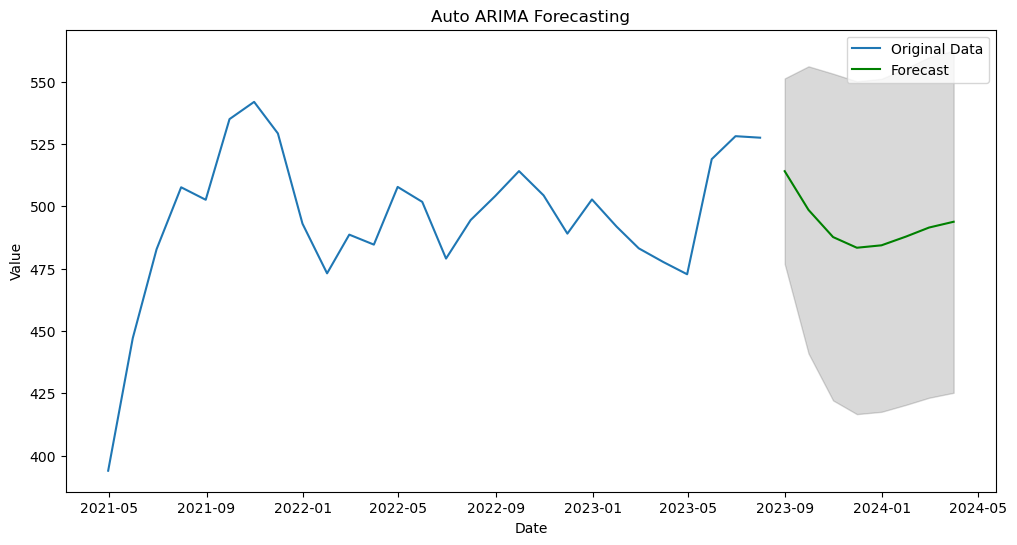

In [25]:
# Number of periods to forecast
n_periods = 8

# Generate forecast
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)

# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(train_data['Adj Close'], label='Original Data')
plt.plot(forecast.index, forecast, label='Forecast', color='green')
plt.fill_between(forecast.index, 
                 conf_int[:, 0], 
                 conf_int[:, 1], 
                 color='k', alpha=.15)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecasting')
plt.show()

In [26]:
len(forecast)

8

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(test_data, forecast)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((test_data - forecast) / forecast)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(test_data, forecast)
print(f'R-squared: {r2}')

RMSE: 42.33041855392458
MAE: 39.2208748143146
MAPE: nan
R-squared: -3.712701343407855


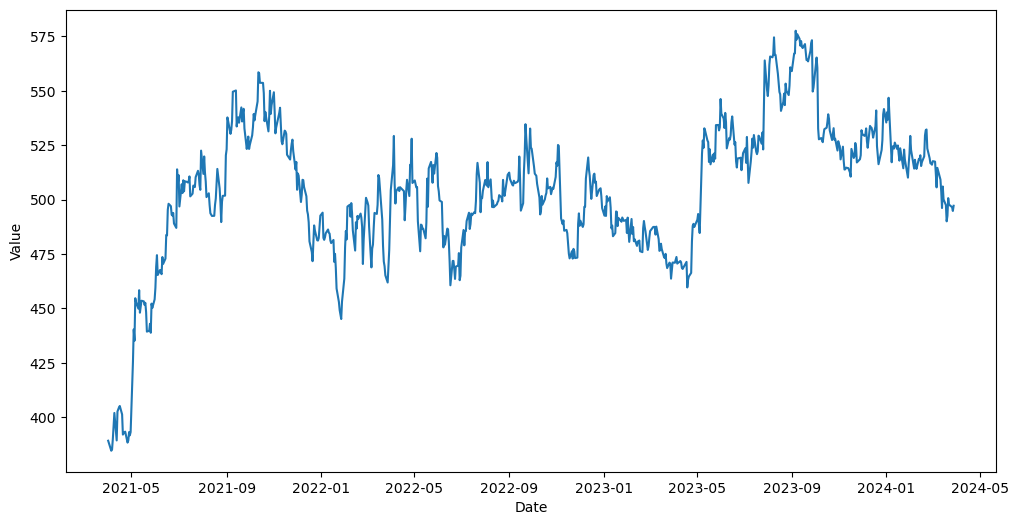

In [30]:
###3.3 ARIMA Daily Data
daily_data= df.copy()
# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [31]:
# Fit auto_arima model
arima_model = auto_arima(daily_data['Adj Close'], 
                         seasonal=True, 
                         m=7,  # Weekly seasonality
                         stepwise=True, 
                         suppress_warnings=True)
# Print the model summary
print(arima_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  740
Model:             SARIMAX(0, 1, 2)x(1, 0, [], 7)   Log Likelihood               -2495.080
Date:                            Mon, 22 Jul 2024   AIC                           4998.160
Time:                                    20:23:43   BIC                           5016.582
Sample:                                         0   HQIC                          5005.263
                                            - 740                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0385      0.033     -1.158      0.247      -0.104       0.027
ma.L2         -0.1111      0.033   

In [32]:
# Generate in-sample predictions
fitted_values = arima_model.predict_in_sample()
fitted_values

Date
2021-04-01      0.000000
2021-04-05    389.247219
2021-04-06    384.812596
2021-04-07    385.674505
2021-04-08    389.759155
                 ...    
2024-03-21    493.952367
2024-03-22    501.061490
2024-03-26    496.093415
2024-03-27    497.516751
2024-03-28    495.130656
Name: predicted_mean, Length: 740, dtype: float64

In [33]:
# Number of periods to forecast
n_periods = 60  # For example, forecast the next 30 days

# Generate forecast
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)

D:\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [34]:
len(forecast)

60

In [37]:
# Create future dates index
last_date = daily_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_periods)

# Convert forecast to a DataFrame with future_dates as the index
forecast_df = pd.DataFrame(forecast.values, index=future_dates, columns=['forecast'])
conf_int_df = pd.DataFrame(conf_int, index=future_dates, columns=['lower_bound', 'upper_bound'])

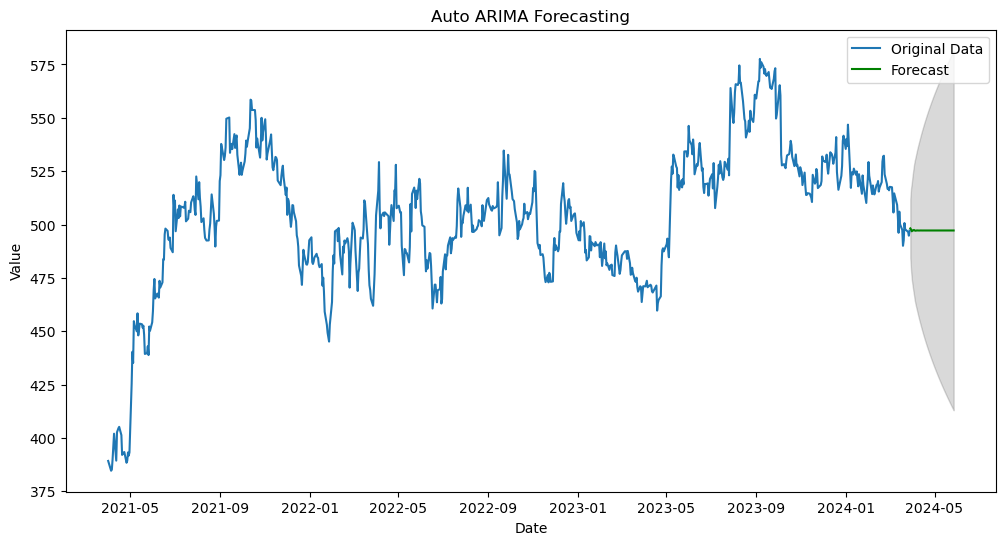

In [38]:
# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Adj Close'], label='Original Data')
plt.plot(forecast_df, label='Forecast', color='green')
plt.fill_between(future_dates, 
                 conf_int_df['lower_bound'], 
                 conf_int_df['upper_bound'], 
                 color='k', alpha=.15)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecasting')
plt.show()

In [43]:
pip install tensorflow



  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ed/b6/62345568cd07de5d9254fcf64d7e44aacbb6abde11ea953b3cb320e58d19/tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.17.0 from https://files.pythonhosted.org/packages/66/03/5c447feceb72f5a38ac2aa79d306fa5b5772f982c2b480c1329c7e382900/tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2d

In [45]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np


In [46]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-01,411.299988,411.600006,406.200012,407.250000,389.247894,645008
2021-04-05,411.250000,417.000000,399.000000,402.450012,384.660004,2105709
2021-04-06,402.850006,405.549988,399.200012,403.000000,385.185730,1032326
2021-04-07,402.950012,413.500000,401.899994,408.000000,389.964691,1687852
2021-04-08,408.049988,415.600006,408.000000,414.649994,396.320709,1917274


In [47]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select features (excluding 'Adj Close') and target ('Adj Close')
features = data.drop(columns=['Adj Close'])
target = data[['Adj Close']]

# Fit the scaler on features and target
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target)

# Create DataFrame with scaled features and target
scaled_df = pd.DataFrame(scaled_features, columns=features.columns, index=df.index)
scaled_df['Adj Close'] = scaled_target

In [48]:
import numpy as np

# Function to create sequences
def create_sequences(scaled_df, target_col, sequence_length):
    sequences = []
    labels = []
    for i in range(len(scaled_df) - sequence_length):
        sequences.append(scaled_df[i:i + sequence_length])
        labels.append(scaled_df[i + sequence_length, target_col])  # Target column index
    return np.array(sequences), np.array(labels)

# Convert DataFrame to NumPy array
data_array = scaled_df.values

# Define the target column index and sequence length
target_col = scaled_df.columns.get_loc('Adj Close')
sequence_length = 30

# Create sequences
X, y = create_sequences(data_array, target_col, sequence_length)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (710, 30, 6)
Shape of y: (710,)


In [49]:
# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 6)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

D:\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 50)         │        11,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,651 (123.64 KB)

 Trainable params: 31,651 (123.64 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - loss: 0.1059 - val_loss: 0.0308
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0121 - val_loss: 0.0034
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0089 - val_loss: 0.0045
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0089 - val_loss: 0.0044
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0101 - val_loss: 0.0036
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0099 - val_loss: 0.0048
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0098 - val_loss: 0.0036
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0096 - val_loss: 0.0044
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0087 - val_loss: 0.0046
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0090 - val_loss: 0.0063
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0094 - val_loss: 0.0068
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.

In [52]:
# Predict on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and true values to get them back to the original scale
y_test_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), 5)), y_test.reshape(-1, 1)), axis=1))[:, 5]
y_pred_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), 5)), y_pred), axis=1))[:, 5]

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step


In [53]:
# Print some predictions and true values
print("Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_scaled[i]}, True Value: {y_test_scaled[i]}")

Predictions vs True Values:
Prediction: 532.2400573956184, True Value: 560.821533203125
Prediction: 533.2371005606747, True Value: 559.7413940429688
Prediction: 534.7836313238076, True Value: 559.0540161132812
Prediction: 536.2653547987502, True Value: 567.1057739257812
Prediction: 537.7632139658544, True Value: 567.2039794921875
Prediction: 539.5754488601433, True Value: 577.6122436523438
Prediction: 541.6613694752959, True Value: 573.4881591796875
Prediction: 543.9103261361251, True Value: 576.0411987304688
Prediction: 545.8461146589907, True Value: 573.8809814453125
Prediction: 547.4066304553871, True Value: 570.7388916015625


In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_pred_scaled)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test_scaled, y_pred_scaled)
print(f'R-squared: {r2}')

RMSE: 14.461055875208716
MAE: 11.75578283662197
MAPE: 2.2479661806593394
R-squared: 0.4777302362398179


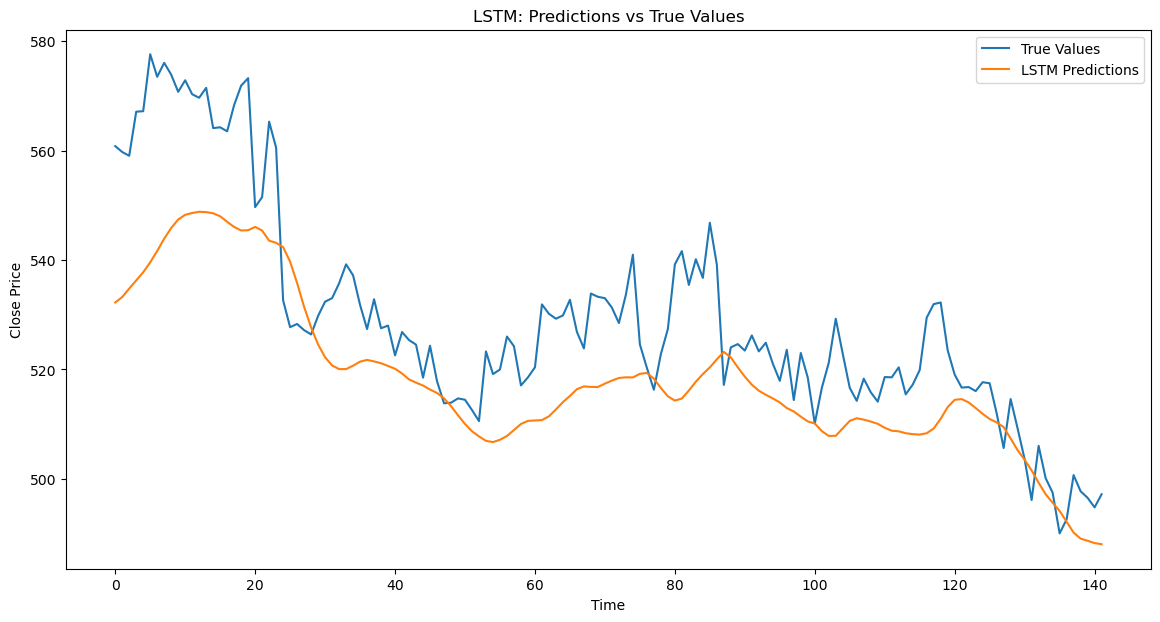

In [55]:
# Plot the predictions vs true values
plt.figure(figsize=(14, 7))
plt.plot(y_test_scaled, label='True Values')
plt.plot(y_pred_scaled, label='LSTM Predictions')
plt.title('LSTM: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [56]:
###Tree Based Chart

In [57]:
from sklearn.ensemble import RandomForestRegressor #ensemble model
from sklearn.tree import DecisionTreeRegressor #simple algo
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [58]:
import numpy as np

def create_sequences(data, target_col, sequence_length):
    """
    Create sequences of features and labels for time series data.
    
    Parameters:
    - data (np.ndarray): The input data where the last column is the target.
    - target_col (int): The index of the target column in the data.
    - sequence_length (int): The length of each sequence.

    Returns:
    - np.ndarray: 3D array of sequences (samples, sequence_length, num_features)
    - np.ndarray: 1D array of target values
    """
    num_samples = len(data) - sequence_length
    num_features = data.shape[1]
    
    sequences = np.zeros((num_samples, sequence_length, num_features))
    labels = np.zeros(num_samples)

    for i in range(num_samples):
        sequences[i] = data[i:i + sequence_length]
        labels[i] = data[i + sequence_length, target_col]  # Target is specified column

    return sequences, labels

# Example usage
sequence_length = 30

# Convert DataFrame to NumPy array
data_array = scaled_df.values

# Define the target column index
target_col = scaled_df.columns.get_loc('Adj Close')

# Create sequences
X, y = create_sequences(data_array, target_col, sequence_length)

# Flatten X for Decision Tree
num_samples, seq_length, num_features = X.shape
X_flattened = X.reshape(num_samples, seq_length * num_features)

In [59]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, random_state=42)

In [60]:
# Train Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'MSE (Decision Tree): {mse_dt}')

MSE (Decision Tree): 0.002907637224815184


In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test, y_pred_dt)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_dt)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test, y_pred_dt)
print(f'R-squared: {r2}')

RMSE: 0.05392251129922626
MAE: 0.04142705256768763
MAPE: 84546.30245304518
R-squared: 0.7941263455571043


In [62]:
# Train and evaluate the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")

Random Forest Mean Squared Error: 0.0014621597772076144


In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test, y_pred_rf)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_rf)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test, y_pred_rf)
print(f'R-squared: {r2}')

RMSE: 0.03823819788127592
MAE: 0.029684414098205616
MAPE: 84122.66297146663
R-squared: 0.8964725811926983


In [64]:
# Print some predictions and true values for both models
print("\nDecision Tree Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_dt[i]}, True Value: {y_test[i]}")


Decision Tree Predictions vs True Values:
Prediction: 0.522499631879562, True Value: 0.6581615424776188
Prediction: 0.6273980614801464, True Value: 0.7088455980308284
Prediction: 0.629119330965026, True Value: 0.5848079107223716
Prediction: 0.657152789672826, True Value: 0.6281543888417833
Prediction: 0.4967791240995283, True Value: 0.6478230124382793
Prediction: 0.5590628879400266, True Value: 0.5170281996862396
Prediction: 0.7178199868125101, True Value: 0.7081512699008441
Prediction: 0.8061881875963894, True Value: 0.7809247659884868
Prediction: 0.7676914095794192, True Value: 0.6627830158166048
Prediction: 0.7600680346670601, True Value: 0.7195768425910682


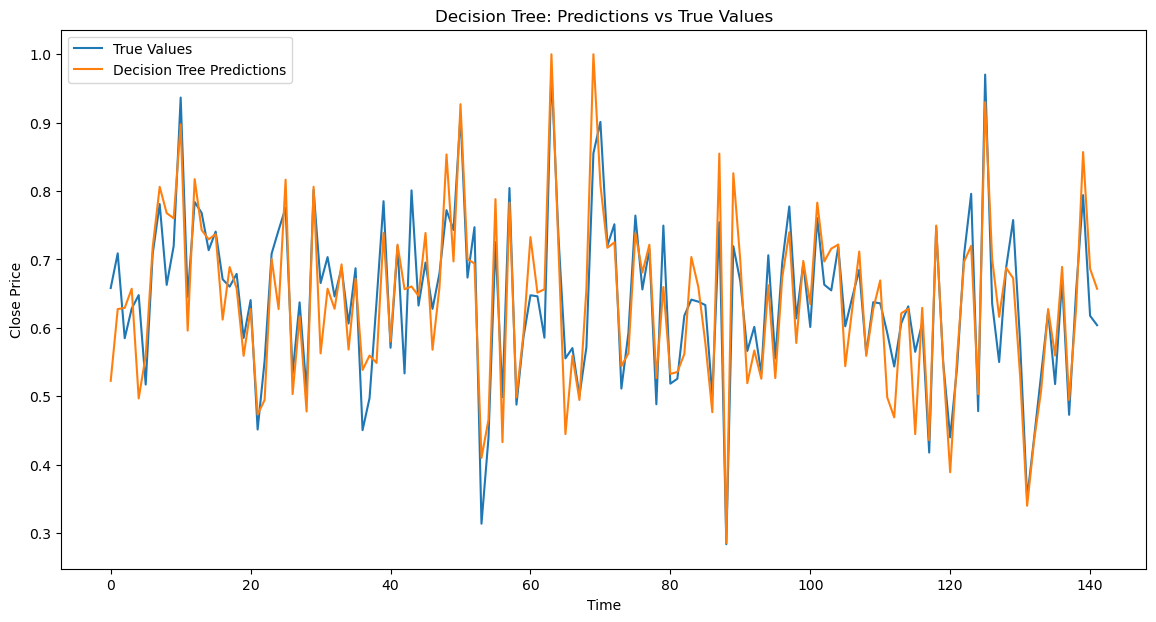

In [65]:
# Plot the predictions vs true values for Decision Tree
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.title('Decision Tree: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [66]:
print("\nRandom Forest Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_rf[i]}, True Value: {y_test[i]}")


Random Forest Predictions vs True Values:
Prediction: 0.6056973751075297, True Value: 0.6581615424776188
Prediction: 0.6661066127399881, True Value: 0.7088455980308284
Prediction: 0.5931967325772274, True Value: 0.5848079107223716
Prediction: 0.6343601529040235, True Value: 0.6281543888417833
Prediction: 0.542165191891576, True Value: 0.6478230124382793
Prediction: 0.5235691945429922, True Value: 0.5170281996862396
Prediction: 0.697366003765188, True Value: 0.7081512699008441
Prediction: 0.8042828088625369, True Value: 0.7809247659884868
Prediction: 0.6911089922768252, True Value: 0.6627830158166048
Prediction: 0.7460028478524623, True Value: 0.7195768425910682


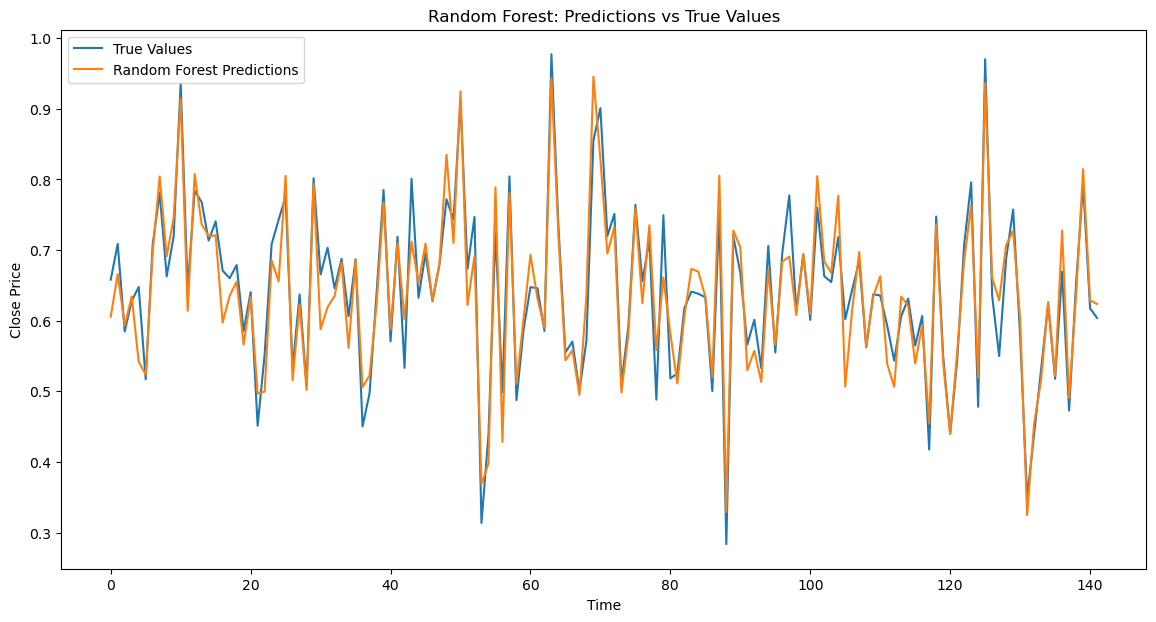

In [67]:
# Plot the predictions vs true values for Random Forest
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

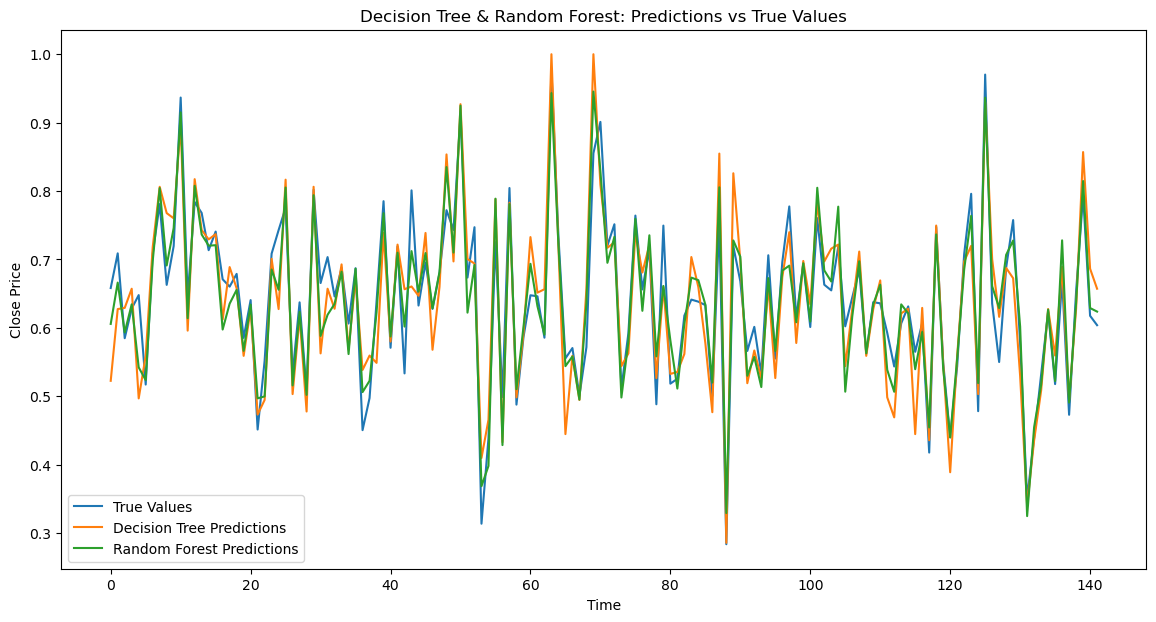

In [68]:
# Plot both Decision Tree and Random Forest predictions together
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Decision Tree & Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()